**Project Title : Predictive Analytics for Fair Valuation in the Indian Used Car Market**

**Understanding the Problem Statement**

The used car market in India is highly dynamic, with prices influenced by multiple factors such as brand, model, mileage, condition, and prevailing market trends. This inherent variability often makes it challenging for sellers to determine accurate pricing, while buyers may struggle to assess whether a listed price is fair.

**Approach**

To address this challenge, we propose developing a machine learning model capable of predicting the price of a used car based on its attributes. The model will be trained on a dataset of cars listed on Cardekho.com, incorporating key features such as vehicle specifications and seller information. Once trained, the model will serve as a predictive tool to estimate the market value of any used car, given its features.

**Objective**

To design and implement a robust Machine Learning Model for Used Car Price Prediction that ensures accurate and reliable price estimates.

**Benefits**

The proposed solution offers several benefits:

For Sellers: Enables more accurate pricing, leading to faster sales and improved profit margins.

For Buyers: Facilitates better decision-making by identifying competitively priced vehicles.

For the Market: Contributes to greater transparency and efficiency in the used car ecosystem.

**Conclusion**

This project aims to bring measurable improvements to the used car market in India by enhancing pricing accuracy and market efficiency. With the integration of data-driven insights, the solution has the potential to positively impact both buyers and sellers, ultimately fostering a more reliable and efficient marketplace.

**Data Decritption**

car_name: Car's Full name, which includes brand and specific model name.

brand: Brand Name of the particular car.

model: Exact model name of the car of a particular brand.

seller_type: Which Type of seller is selling the used car

fuel_type: Fuel used in the used car, which was put up on sale.

transmission_type: Transmission used in the used car, which was put on sale.

vehicle_age: The count of years since car was bought.

mileage: It is the number of kilometer the car runs per litre.

engine: It is the engine capacity in cc(cubic centimeters)

max_power: Max power it produces in BHP.

seats: Total number of seats in car.

selling_price: The sale price which was put up on website.

**Importing Libraries and Dependencies**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Reading the data file

df = pd.read_csv('cardekho_imputated.csv')

**Understanding the Data**

In [6]:
df.head()

Unnamed: 0       car_name    brand     model  vehicle_age  km_driven  \
0           0    Maruti Alto   Maruti      Alto            9     120000   
1           1  Hyundai Grand  Hyundai     Grand            5      20000   
2           2    Hyundai i20  Hyundai       i20           11      60000   
3           3    Maruti Alto   Maruti      Alto            9      37000   
4           4  Ford Ecosport     Ford  Ecosport            6      30000   

  seller_type fuel_type transmission_type  mileage  engine  max_power  seats  \
0  Individual    Petrol            Manual    19.70     796      46.30      5   
1  Individual    Petrol            Manual    18.90    1197      82.00      5   
2  Individual    Petrol            Manual    17.00    1197      80.00      5   
3  Individual    Petrol            Manual    20.92     998      67.10      5   
4      Dealer    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

In [7]:
df.tail()

Unnamed: 0         car_name     brand   model  vehicle_age  km_driven  \
15406       19537      Hyundai i10   Hyundai     i10            9      10723   
15407       19540    Maruti Ertiga    Maruti  Ertiga            2      18000   
15408       19541      Skoda Rapid     Skoda   Rapid            6      67000   
15409       19542  Mahindra XUV500  Mahindra  XUV500            5    3800000   
15410       19543       Honda City     Honda    City            2      13000   

      seller_type fuel_type transmission_type  mileage  engine  max_power  \
15406      Dealer    Petrol            Manual    19.81    1086      68.05   
15407      Dealer    Petrol            Manual    17.50    1373      91.10   
15408      Dealer    Diesel            Manual    21.14    1498     103.52   
15409      Dealer    Diesel            Manual    16.00    2179     140.00   
15410      Dealer    Petrol         Automatic    18.00    1497     117.60   

       seats  selling_price  
15406      5         250000  
15407      7         925000  
15408      5         425000  
15409      7        1225000  
15410      5        1200000

In [8]:
df.shape # total number of rows and columns

(15411, 14)

In [9]:
# Checking the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


**DATA PREPROCESSING**

In [10]:
# Removing unnecessary column

df.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [11]:
df.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

In [12]:
# Dividing columns into numerical and categorical features

numerical_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

In [13]:
numerical_features # numerical features

Index(['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

In [14]:
categorical_features # categorical features

Index(['car_name', 'brand', 'model', 'seller_type', 'fuel_type',
       'transmission_type'],
      dtype='object')

In [15]:
# Statistical Summary of numerical features

df.describe()

vehicle_age     km_driven       mileage        engine     max_power  \
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
mean       6.036338  5.561648e+04     19.701151   1486.057751    100.588254   
std        3.013291  5.161855e+04      4.171265    521.106696     42.972979   
min        0.000000  1.000000e+02      4.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
max       29.000000  3.800000e+06     33.540000   6592.000000    626.000000   

              seats  selling_price  
count  15411.000000   1.541100e+04  
mean       5.325482   7.749711e+05  
std        0.807628   8.941284e+05  
min        0.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50%        5.000000   5.560000e+05  
75%        5.000000   8.250000e+05  
max        9.000000   3.950000e+07

In [16]:
# Statistical Summary of Categorical features

df.describe(include='object')

car_name   brand  model seller_type fuel_type transmission_type
count         15411   15411  15411       15411     15411             15411
unique          121      32    120           3         5                 2
top     Hyundai i20  Maruti    i20      Dealer    Petrol            Manual
freq            906    4992    906        9539      7643             12225

In [17]:
# Checking for misspells , errors in categorical features
for col in categorical_features:
    print(col)
    print(df[col].unique())
    print('-'*120)

car_name
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endeavour'
 'Mahindra KUV' 'Honda Jazz' 'BMW 3' 'Audi A4' 'Tata Tigor'
 'Maruti Ertiga' 'Tata Safari' 'Mahindra Thar' 'Tata Hexa'
 'Land Rover Rover' 'Maruti Eeco' 'Audi A6' 'Mercedes-Benz E-Class'
 'Audi Q7' 'BMW Z4' 'BMW 6' 'Jaguar XF' 'BMW X5' 'MG Hector' 'Honda Civic'
 'Isuzu D-Max' 'Porsche Cayenne' 'BMW X1' 'Skoda Rapid' 'Ford Freestyle

**EXPLORATORY DATA ANALYSIS**

<Axes: xlabel='selling_price', ylabel='Count'>

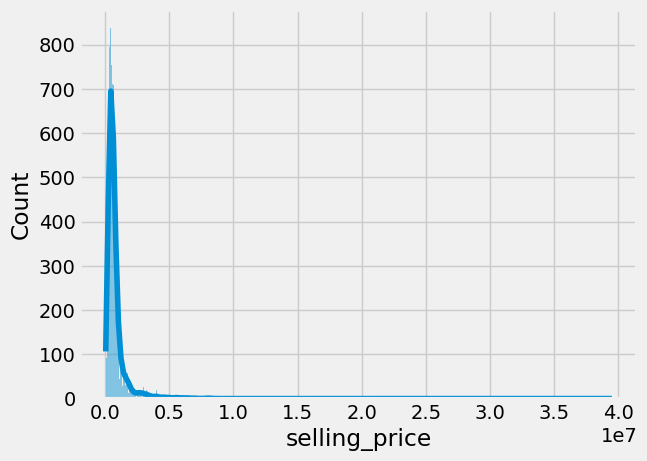

In [63]:
# Distribution of Selling Price

sns.histplot(df['selling_price'], kde=True)

<Axes: xlabel='km_driven', ylabel='Count'>

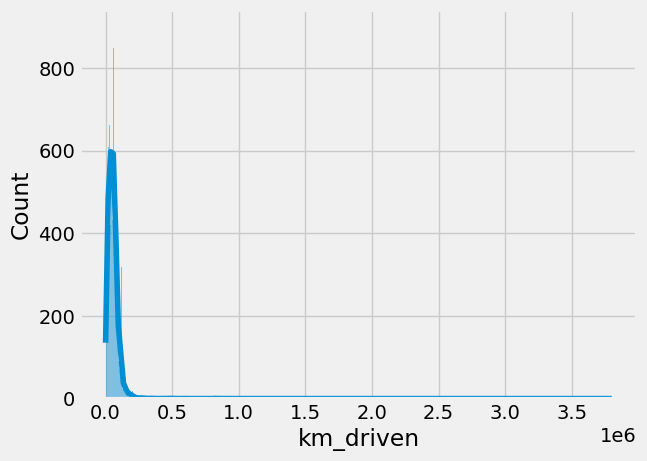

In [64]:
# Distribution of kilometres driven

sns.histplot(df['km_driven'], kde=True)

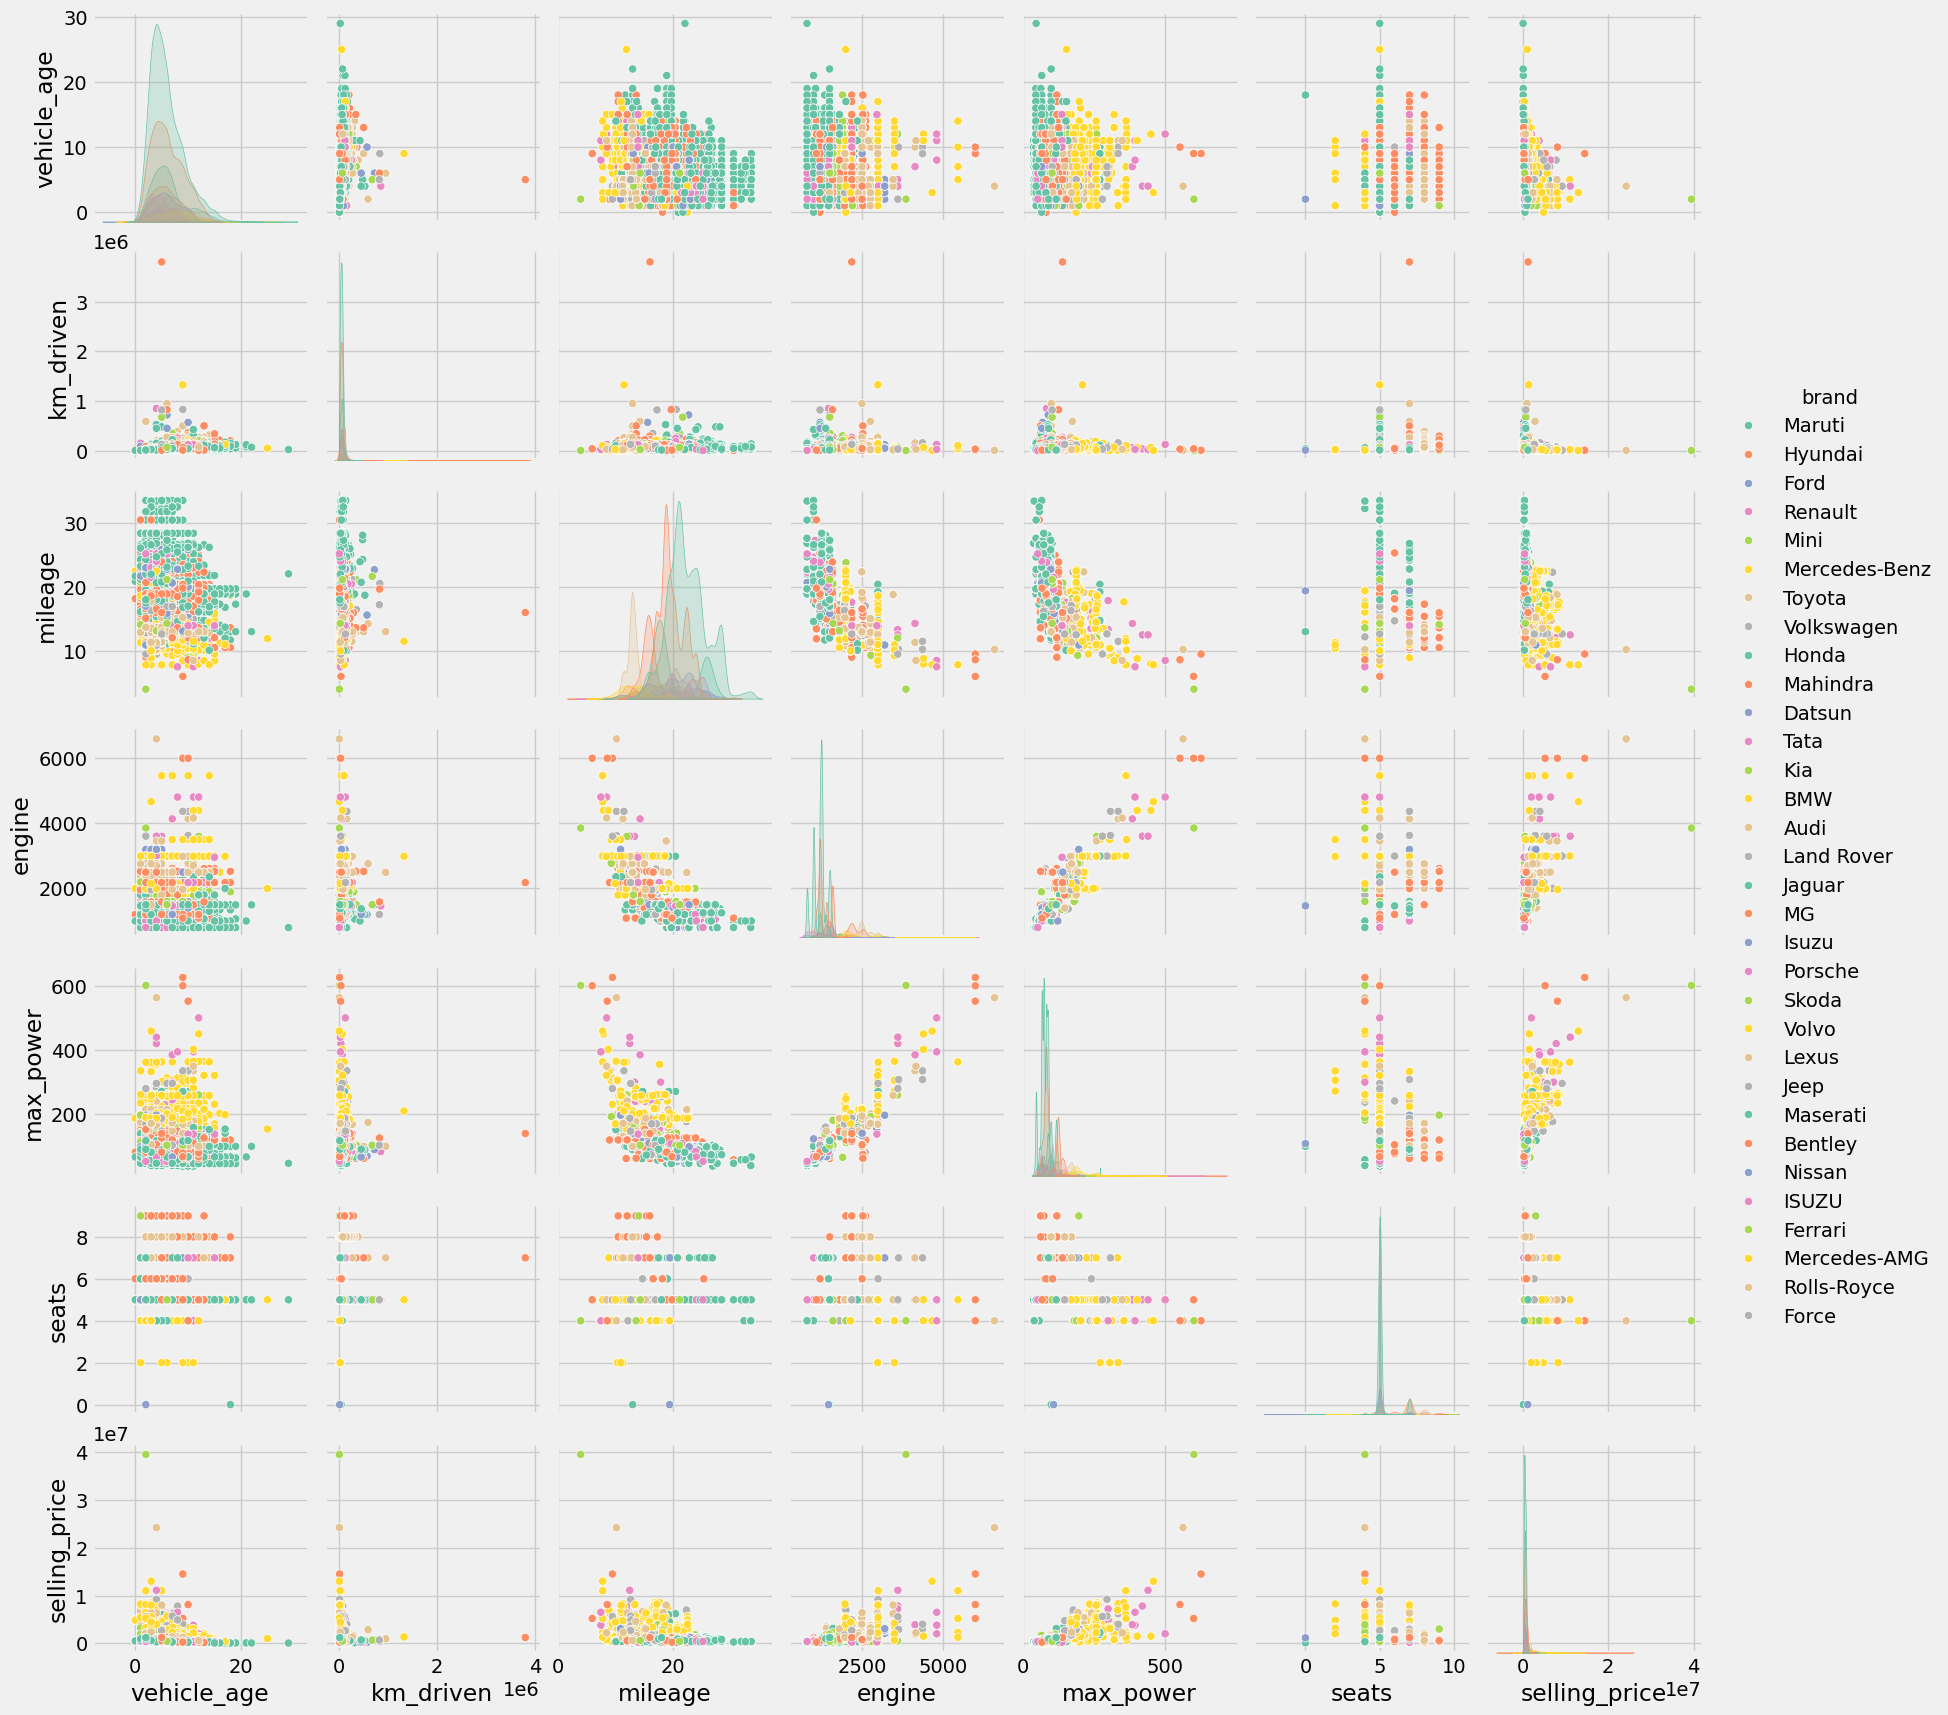

In [65]:
# Pairplot of numerical features with hue as brand

sns.pairplot(df,hue='brand',palette='Set2')

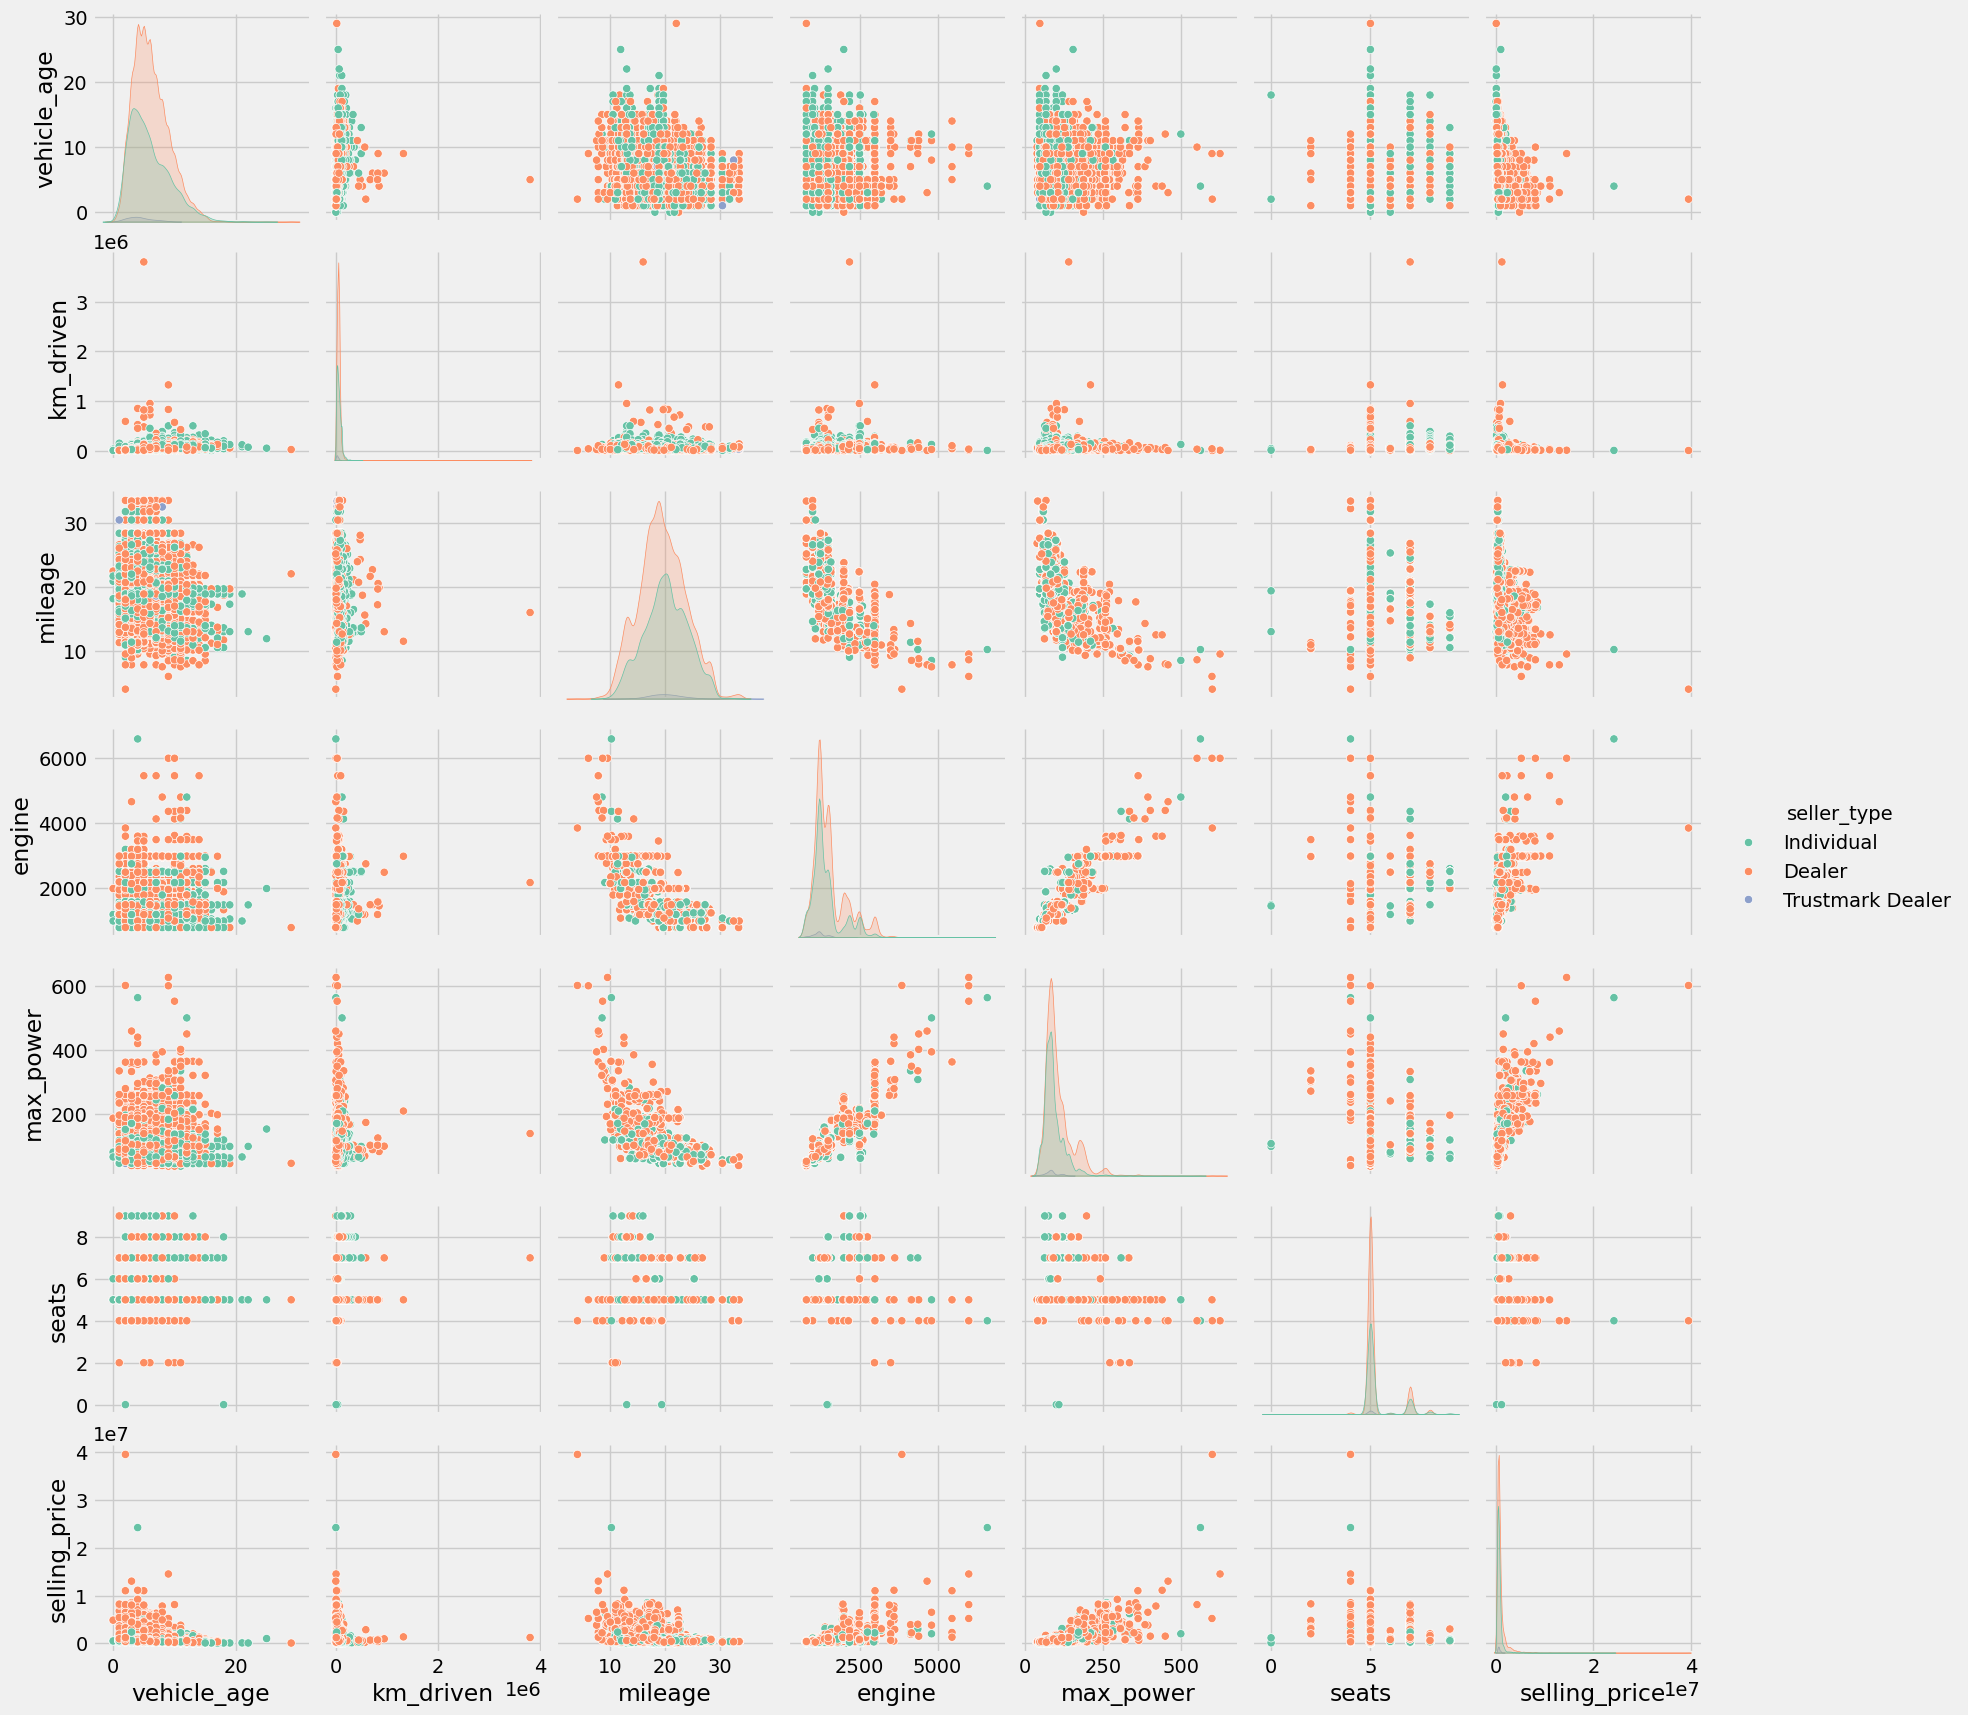

In [66]:
# Pairplot of numerical features with hue as seller types

sns.pairplot(df,hue='seller_type',palette='Set2')

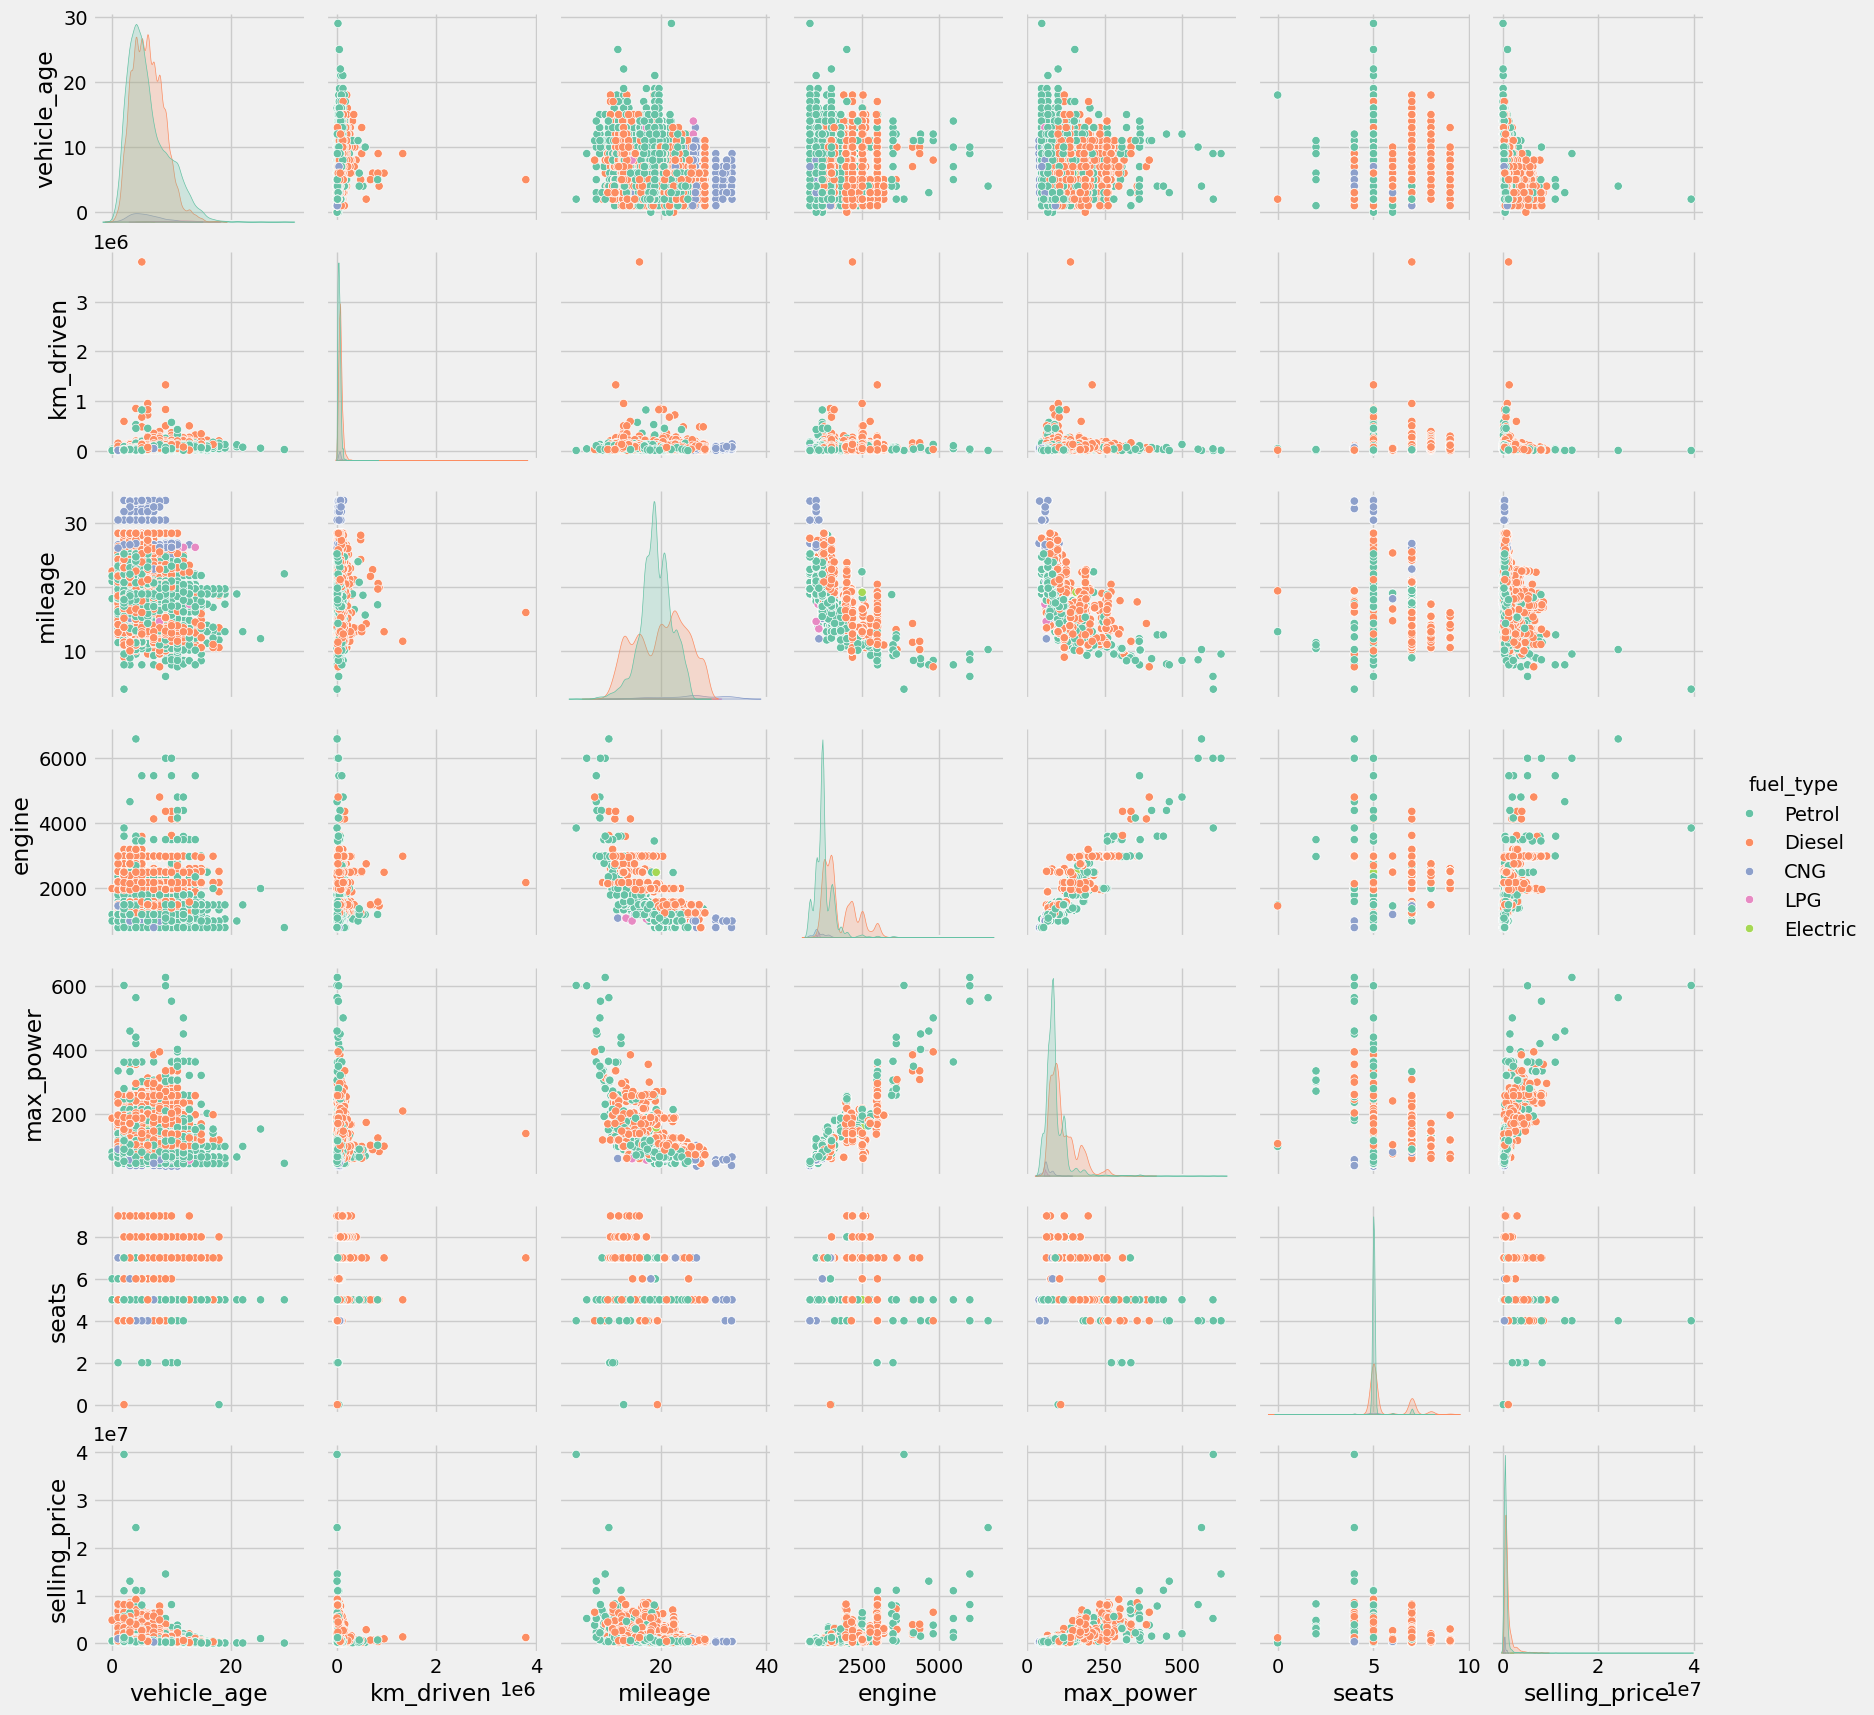

In [67]:
# Pairplot of numerical features with hue as fuel types

sns.pairplot(df,hue='fuel_type',palette='Set2')

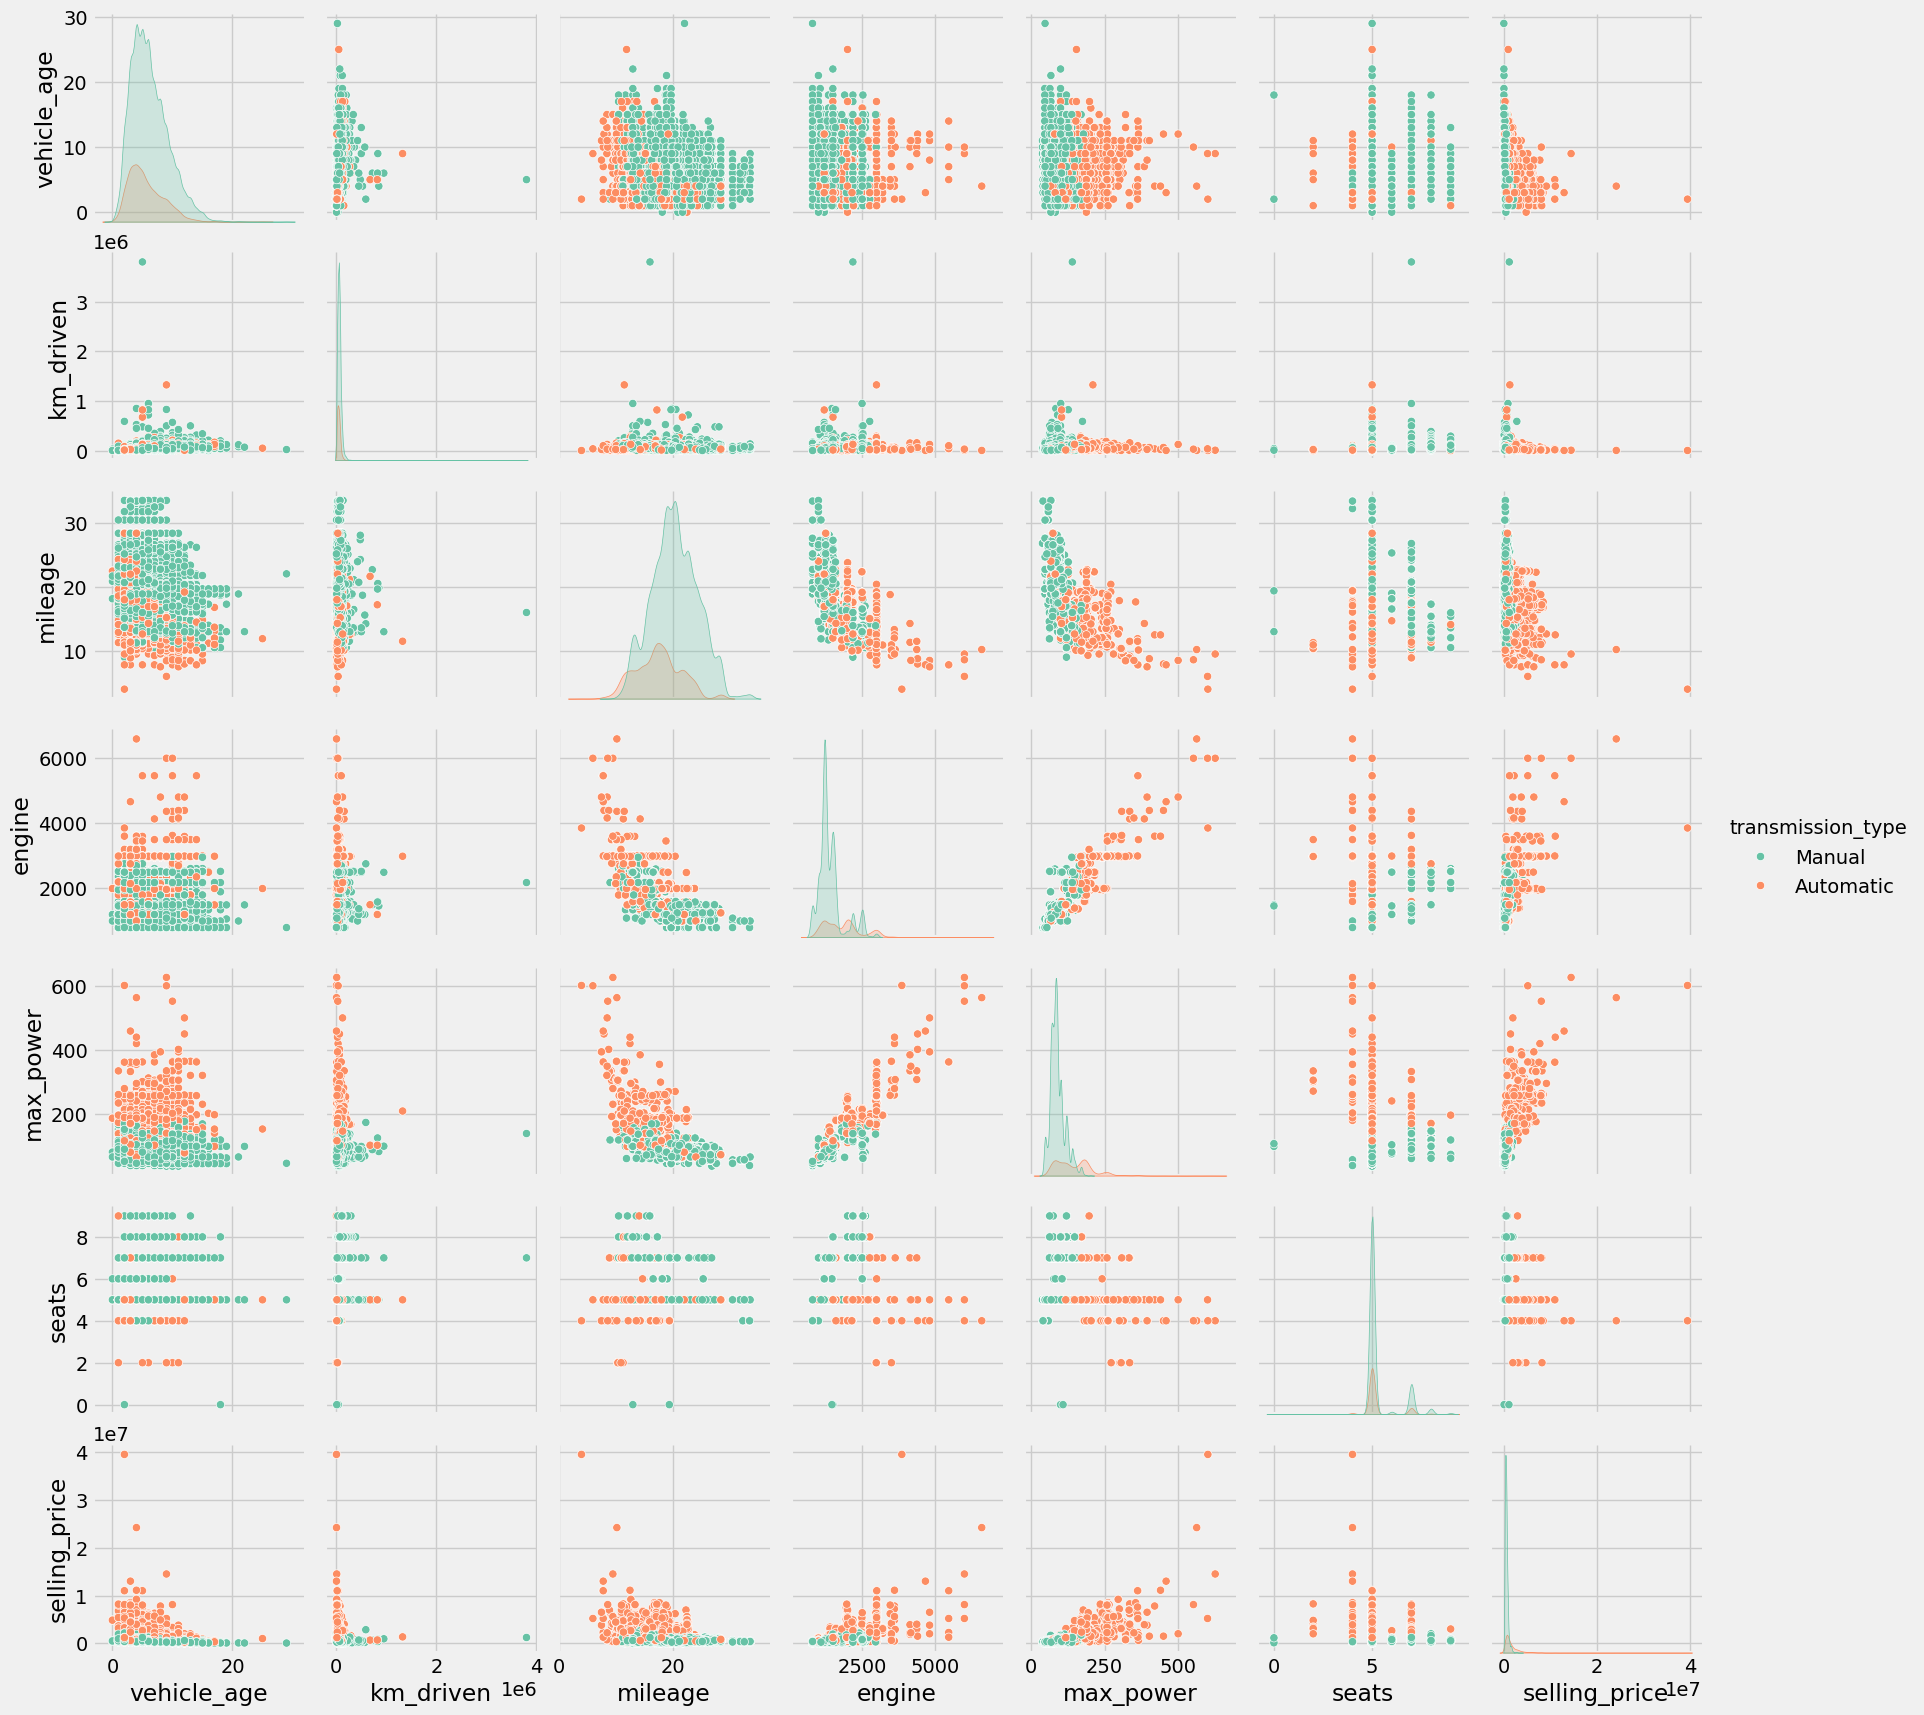

In [68]:
# Pairplot of numerical features with hue as Tranmission types

sns.pairplot(df,hue='transmission_type',palette='Set2')

array([[<Axes: title={'center': 'vehicle_age'}>,
        <Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>,
        <Axes: title={'center': 'seats'}>],
       [<Axes: title={'center': 'selling_price'}>, <Axes: >, <Axes: >]],
      dtype=object)

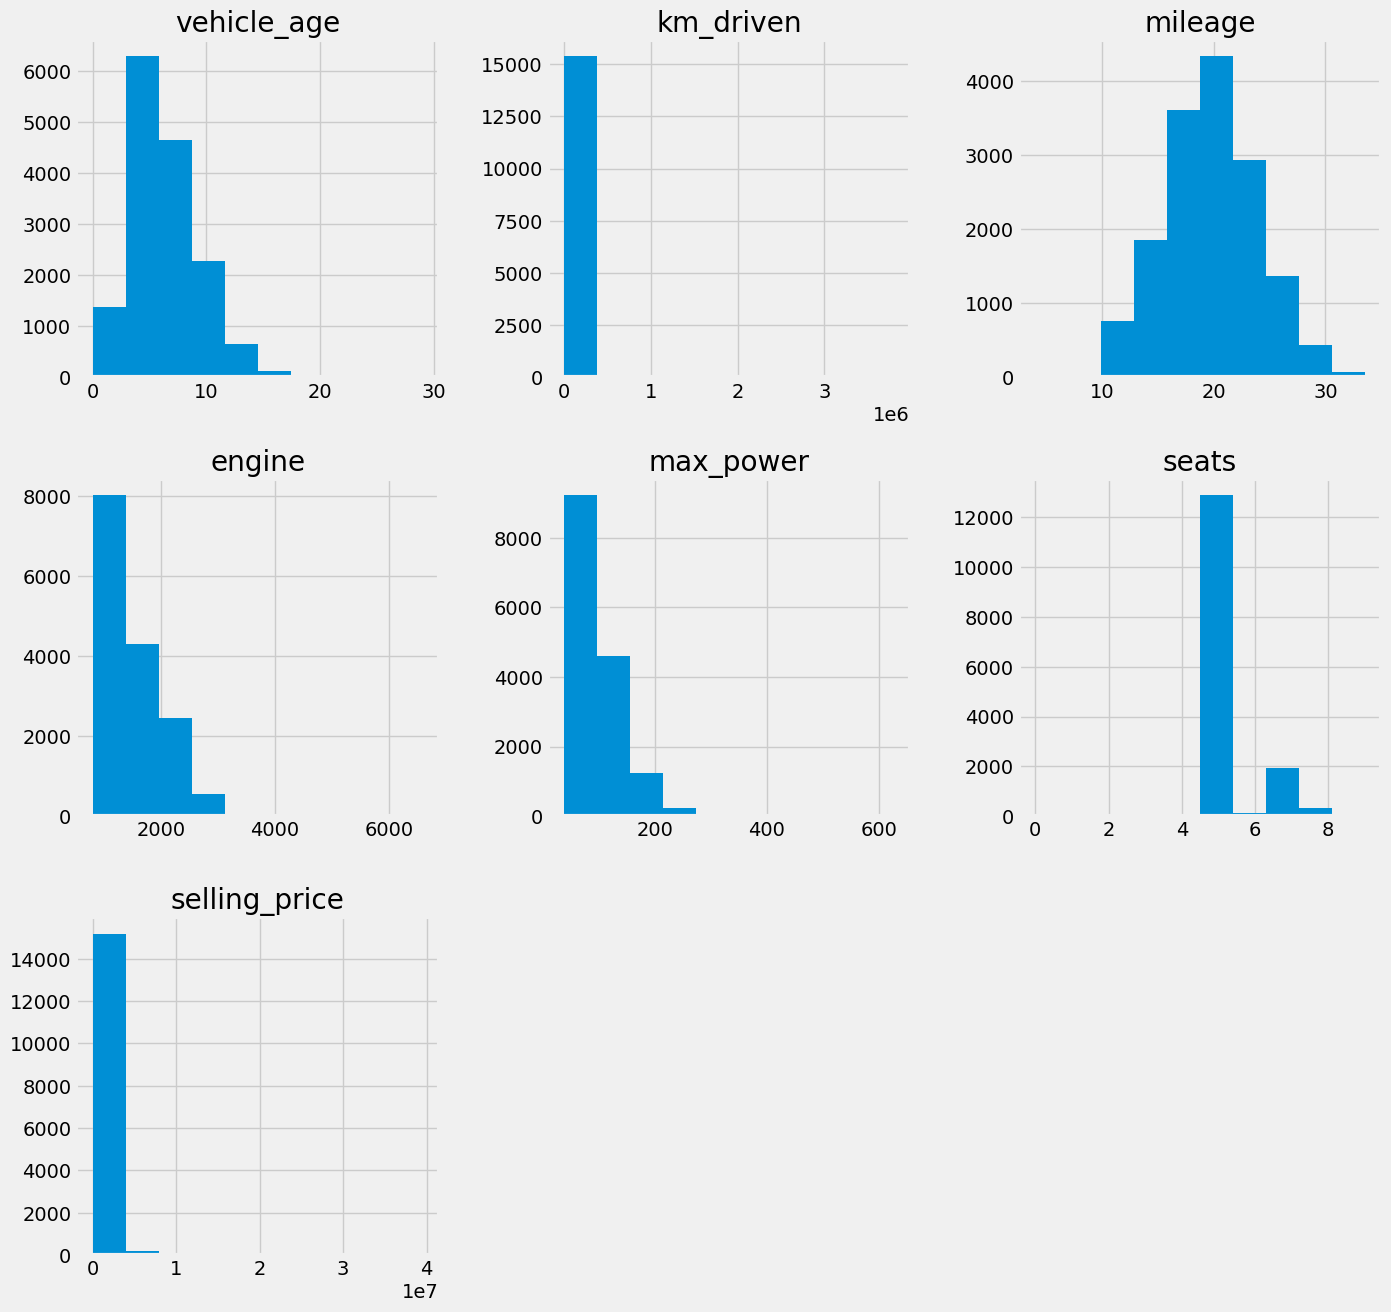

In [69]:
# Histogram of data frame to understand distribution of all numerical fetaures

df.hist(figsize=(15,15))

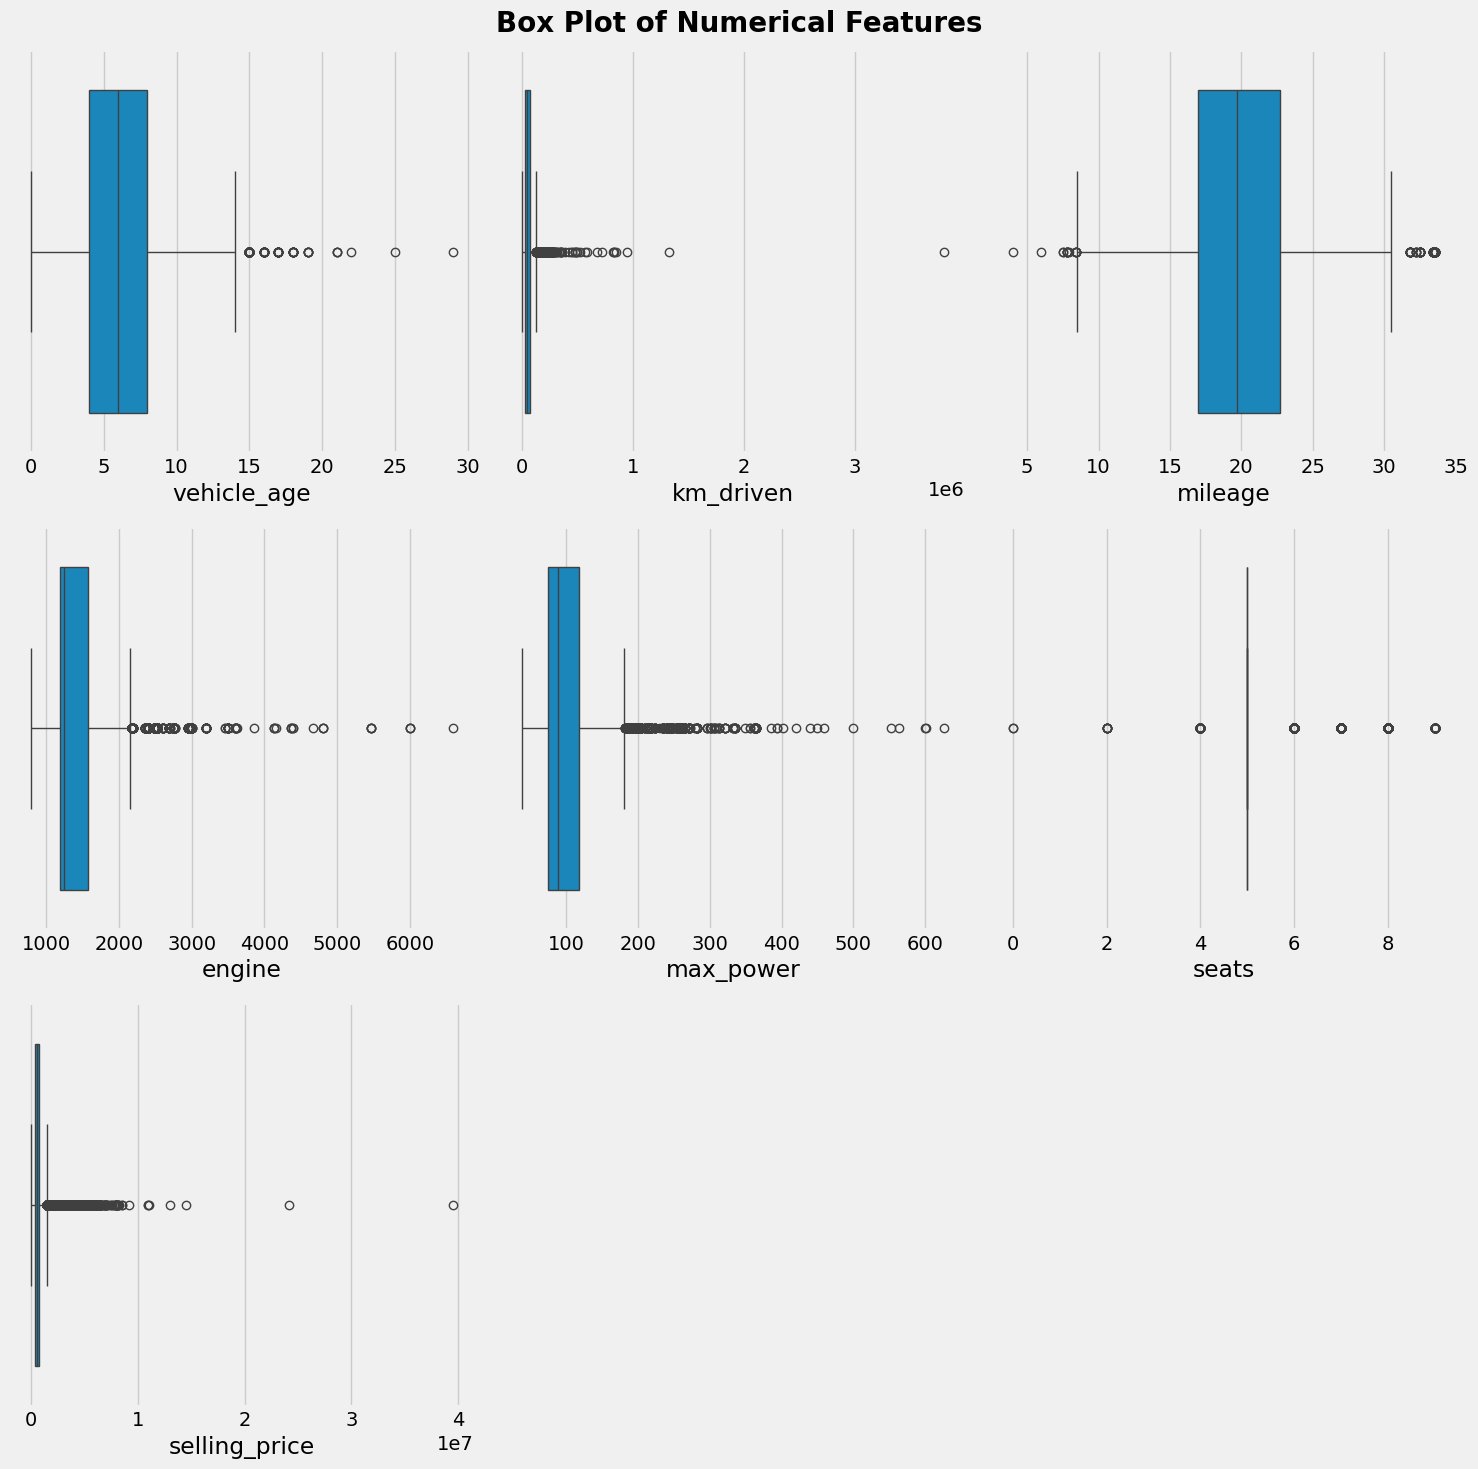

In [70]:
# Boxplot to check any outliers in data

plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(numerical_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numerical_features[i]])
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

<Axes: xlabel='fuel_type', ylabel='count'>

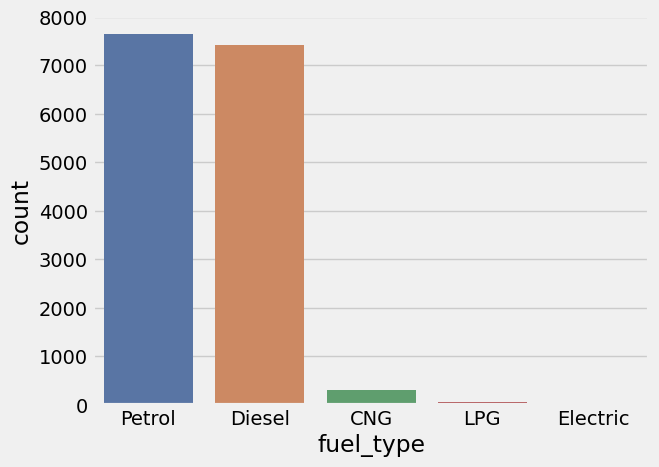

In [71]:
# Distribution of Categorical features fuel types

sns.countplot(data=df, x='fuel_type',palette='deep')

<Axes: xlabel='seller_type', ylabel='count'>

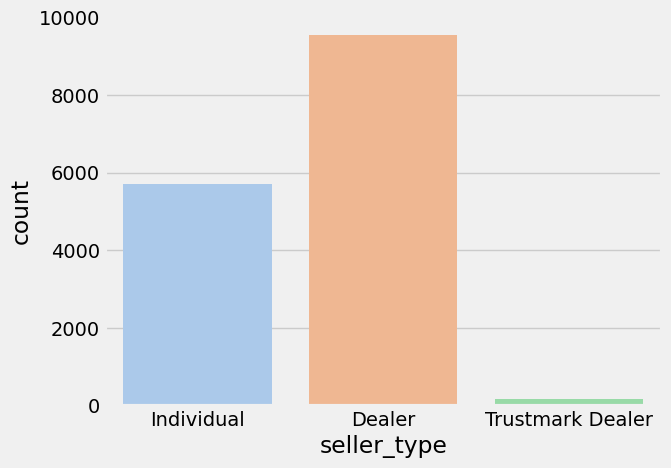

In [72]:
  # Distribution of Categorical features Seller type

sns.countplot(data=df, x='seller_type',palette='pastel')

<Axes: xlabel='transmission_type', ylabel='count'>

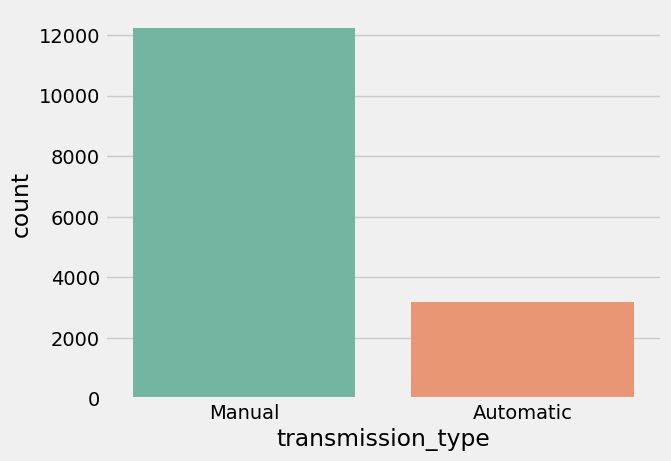

In [73]:
# Distribution of Categorical features tranmission types

sns.countplot(data=df, x='transmission_type',palette='Set2')

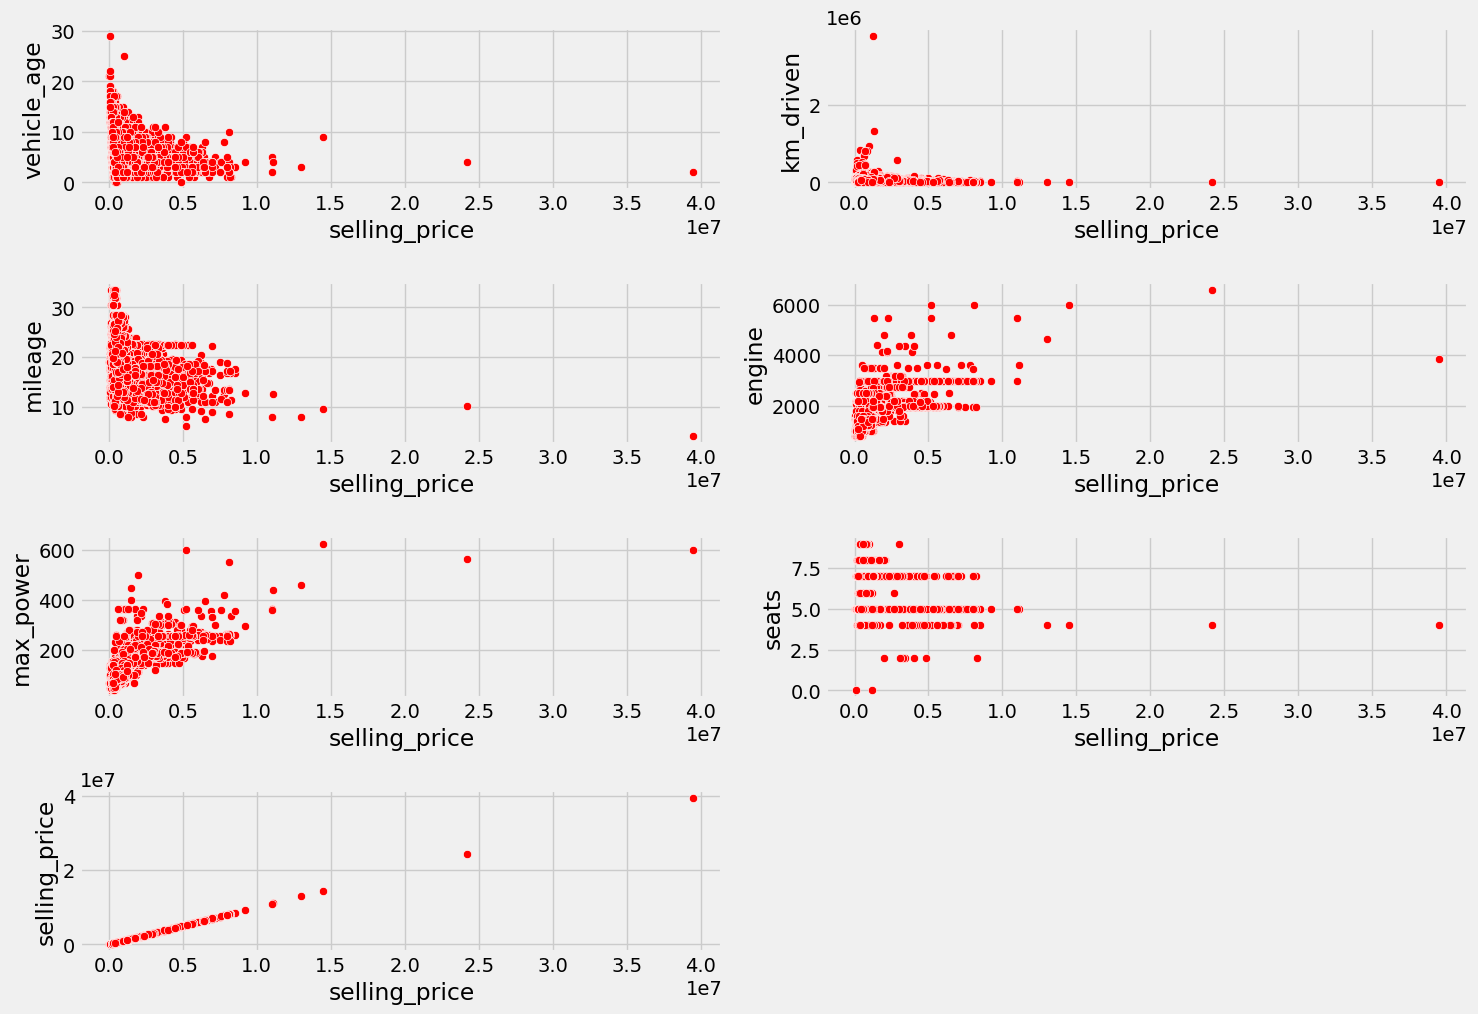

In [74]:
# Scatter plot between numerical features and selling price

fig = plt.figure(figsize=(15, 20))

for i in range(0, len(numerical_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=numerical_features[i], color='r')
    # plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

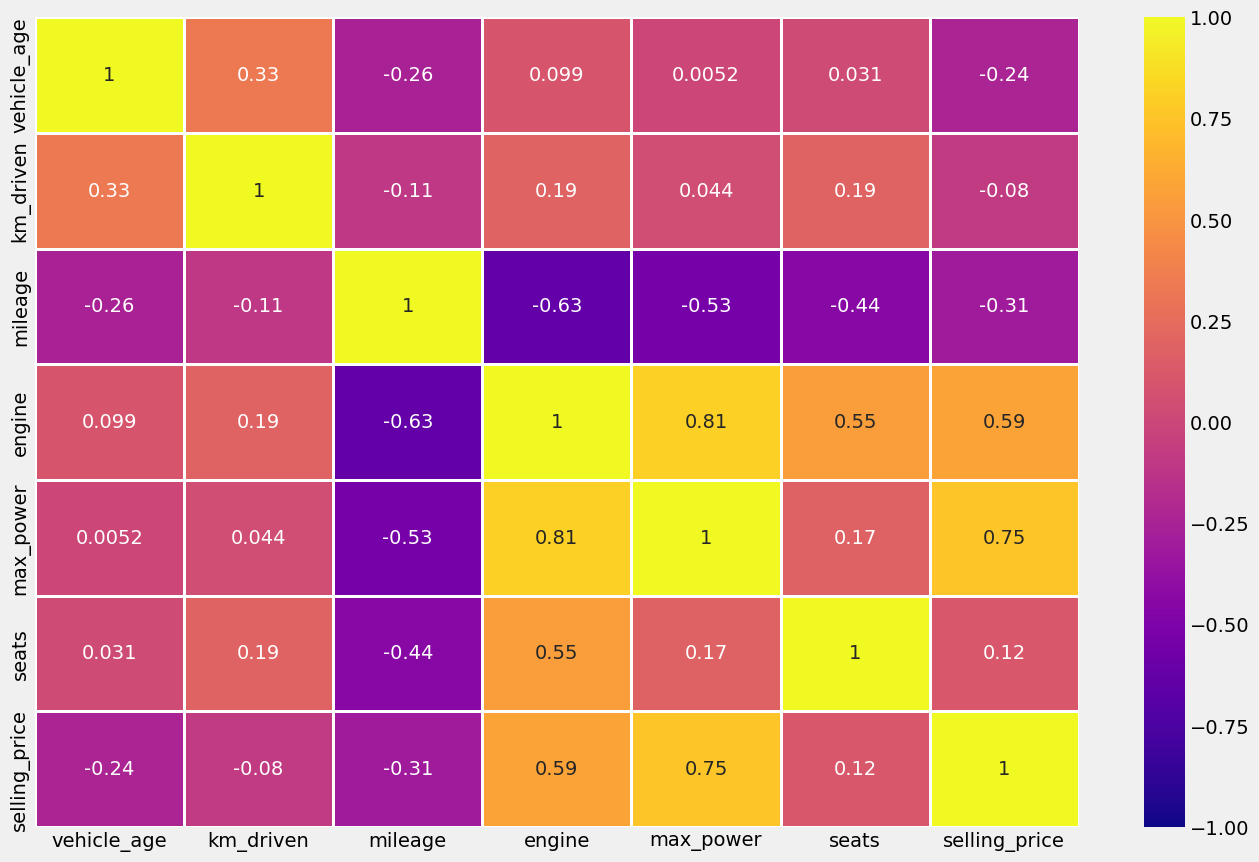

In [75]:
# Heatmap to check correlation and if multi-collinearity is present or not

plt.figure(figsize=(15,10))
sns.heatmap(data = df[numerical_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

<Axes: xlabel='brand'>

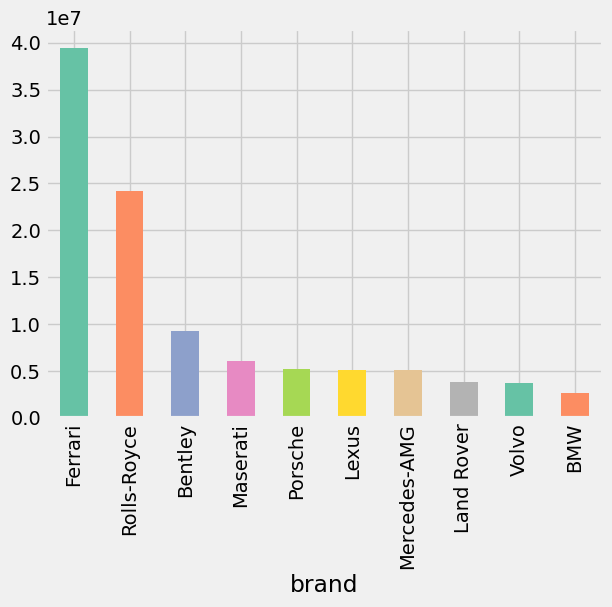

In [76]:
# Top 10 brands by average selling price

df.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color=plt.cm.Set2.colors)

<Axes: xlabel='engine', ylabel='mileage'>

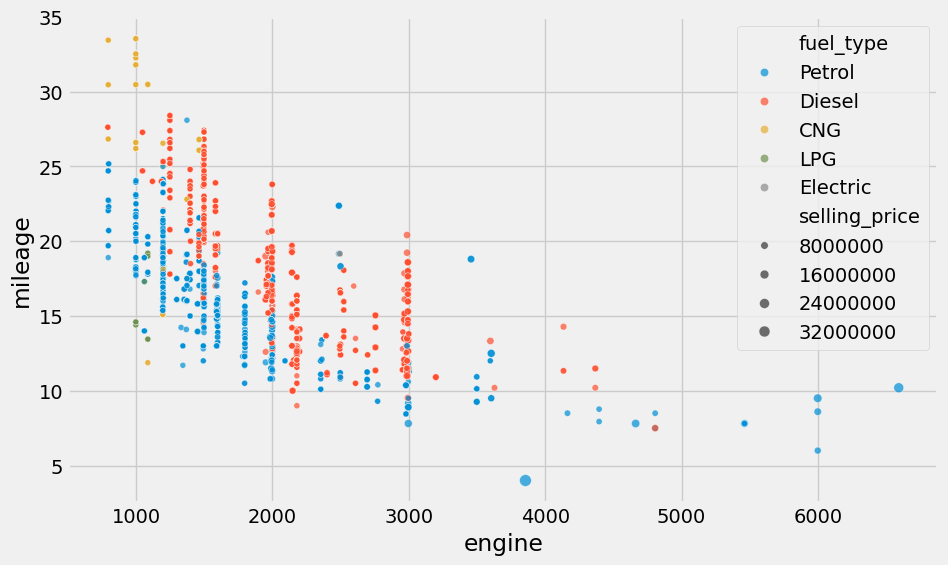

In [77]:
# Distribution of car age by transmission

plt.figure(figsize=(10,6))
sns.scatterplot(x='engine', y='mileage', size='selling_price', hue='fuel_type', data=df, alpha=0.7)


<Axes: xlabel='model'>

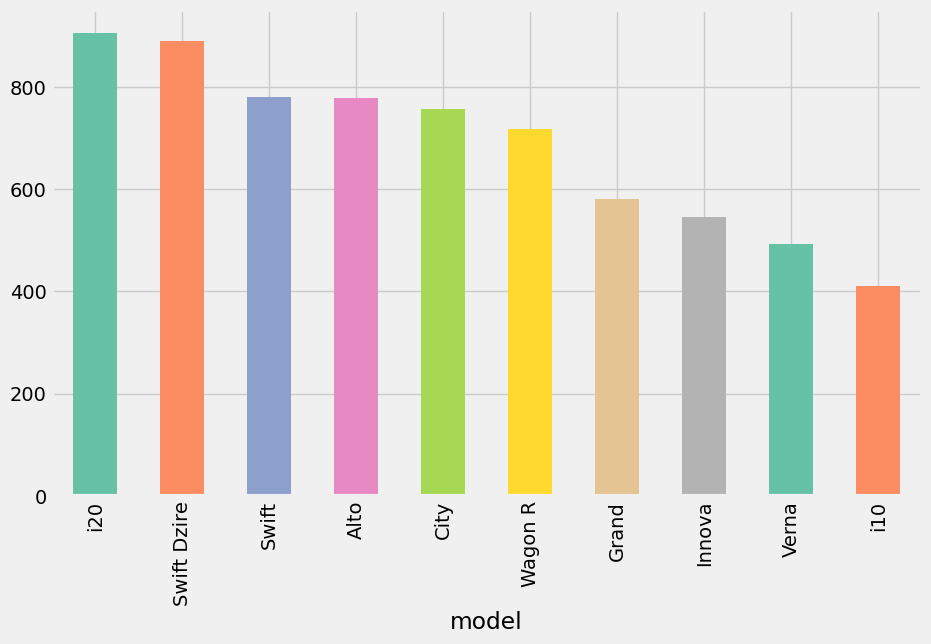

In [78]:
# Top 10 Most Sold Car

plt.figure(figsize=(10,6))
df['model'].value_counts().head(10).plot(kind='bar',color=plt.cm.Set2.colors)

<Axes: xlabel='brand'>

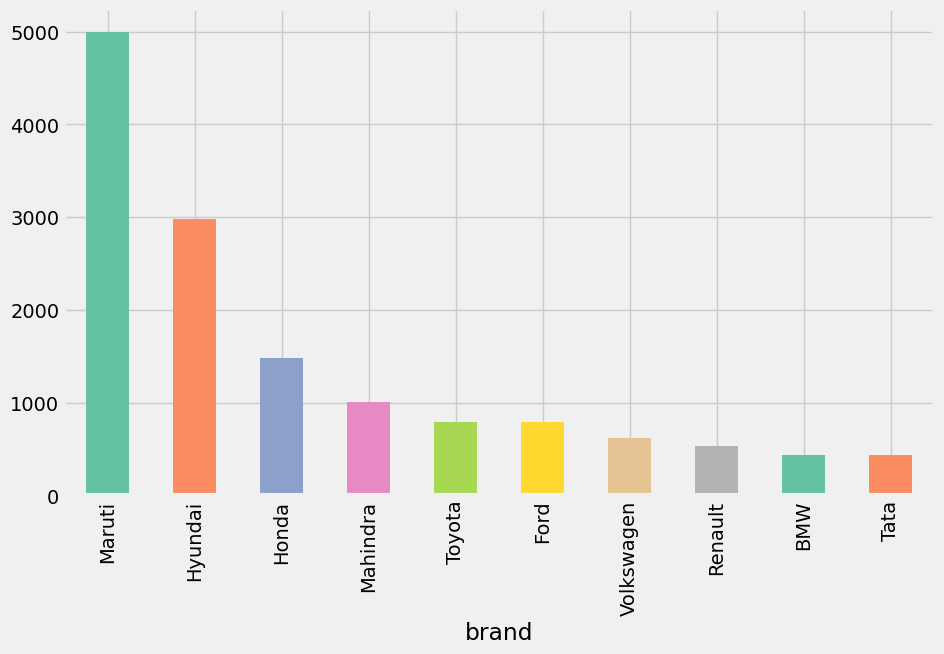

In [79]:
# Top 10 Most sold Brand

plt.figure(figsize=(10,6))
df['brand'].value_counts().head(10).plot(kind='bar',color=plt.cm.Set2.colors)

**FEATURE SELECTION**

In [18]:
# Creating a copy of dataframe

df_model = df.copy()
df_model.head()

car_name    brand     model  vehicle_age  km_driven seller_type  \
0    Maruti Alto   Maruti      Alto            9     120000  Individual   
1  Hyundai Grand  Hyundai     Grand            5      20000  Individual   
2    Hyundai i20  Hyundai       i20           11      60000  Individual   
3    Maruti Alto   Maruti      Alto            9      37000  Individual   
4  Ford Ecosport     Ford  Ecosport            6      30000      Dealer   

  fuel_type transmission_type  mileage  engine  max_power  seats  \
0    Petrol            Manual    19.70     796      46.30      5   
1    Petrol            Manual    18.90    1197      82.00      5   
2    Petrol            Manual    17.00    1197      80.00      5   
3    Petrol            Manual    20.92     998      67.10      5   
4    Diesel            Manual    22.77    1498      98.59      5   

   selling_price  
0         120000  
1         550000  
2         215000  
3         226000  
4         570000

In [19]:
# Dropping Unnecessary Columns

df_model.drop(['car_name','brand','model'],axis=1,inplace=True)

In [20]:
df_model.head()

vehicle_age  km_driven seller_type fuel_type transmission_type  mileage  \
0            9     120000  Individual    Petrol            Manual    19.70   
1            5      20000  Individual    Petrol            Manual    18.90   
2           11      60000  Individual    Petrol            Manual    17.00   
3            9      37000  Individual    Petrol            Manual    20.92   
4            6      30000      Dealer    Diesel            Manual    22.77   

   engine  max_power  seats  selling_price  
0     796      46.30      5         120000  
1    1197      82.00      5         550000  
2    1197      80.00      5         215000  
3     998      67.10      5         226000  
4    1498      98.59      5         570000

In [21]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_age        15411 non-null  int64  
 1   km_driven          15411 non-null  int64  
 2   seller_type        15411 non-null  object 
 3   fuel_type          15411 non-null  object 
 4   transmission_type  15411 non-null  object 
 5   mileage            15411 non-null  float64
 6   engine             15411 non-null  int64  
 7   max_power          15411 non-null  float64
 8   seats              15411 non-null  int64  
 9   selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.2+ MB


In [22]:
# One hot Encoding Categorical fetaures

df_model=pd.get_dummies(df_model,dtype=int)

In [23]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   vehicle_age                   15411 non-null  int64  
 1   km_driven                     15411 non-null  int64  
 2   mileage                       15411 non-null  float64
 3   engine                        15411 non-null  int64  
 4   max_power                     15411 non-null  float64
 5   seats                         15411 non-null  int64  
 6   selling_price                 15411 non-null  int64  
 7   seller_type_Dealer            15411 non-null  int64  
 8   seller_type_Individual        15411 non-null  int64  
 9   seller_type_Trustmark Dealer  15411 non-null  int64  
 10  fuel_type_CNG                 15411 non-null  int64  
 11  fuel_type_Diesel              15411 non-null  int64  
 12  fuel_type_Electric            15411 non-null  int64  
 13  f

In [24]:
# Independent and Dependent Variables

X=df_model.drop('selling_price',axis=1)
y=df_model['selling_price']

**TRAIN TEST SPLIT**

In [25]:
from sklearn.model_selection import train_test_split

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Standardize the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Scale only on training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [27]:
X_train

array([[ 0.32396921,  0.34910015, -2.05081903, ..., -0.99143834,
         1.97677599, -1.97677599],
       [-1.33779844, -1.06939362,  0.98566075, ...,  1.0086356 ,
        -0.50587421,  0.50587421],
       [-1.33779844, -1.16356435, -0.17704195, ..., -0.99143834,
         1.97677599, -1.97677599],
       ...,
       [ 0.32396921, -0.83396678,  0.18570208, ...,  1.0086356 ,
        -0.50587421,  0.50587421],
       [-1.33779844, -0.9516802 , -0.27313308, ...,  1.0086356 ,
        -0.50587421,  0.50587421],
       [-1.33779844, -0.59853995,  0.13044968, ...,  1.0086356 ,
         1.97677599, -1.97677599]])

In [28]:
X_test

array([[ 1.98573685,  0.41379545,  0.1496679 , ...,  1.0086356 ,
        -0.50587421,  0.50587421],
       [-0.67309138,  0.06065519,  1.83846956, ..., -0.99143834,
        -0.50587421,  0.50587421],
       [ 0.32396921,  0.95527717,  0.24816131, ..., -0.99143834,
        -0.50587421,  0.50587421],
       ...,
       [-1.33779844, -1.25302655, -0.393247  , ...,  1.0086356 ,
         1.97677599, -1.97677599],
       [-1.00544491, -0.59853995,  0.18570208, ...,  1.0086356 ,
        -0.50587421,  0.50587421],
       [-1.33779844, -0.92813752,  0.67336457, ..., -0.99143834,
        -0.50587421,  0.50587421]])

**MODEL SELECTION**

In [29]:
## Model Training and Selection

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge , Lasso , ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [30]:
##Create a Function to Evaluate Model

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [49]:
## Beginning Model Training

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Elasticnet": ElasticNet(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor()

}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 554161.2010
- Mean Absolute Error: 266847.7116
- R2 Score: 0.6214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502095.1435
- Mean Absolute Error: 278351.6283
- R2 Score: 0.6651


Lasso
Model performance for Training set
- Root Mean Squared Error: 554161.2010
- Mean Absolute Error: 266847.0531
- R2 Score: 0.6214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502094.8303
- Mean Absolute Error: 278350.9180
- R2 Score: 0.6651


Ridge
Model performance for Training set
- Root Mean Squared Error: 554161.2113
- Mean Absolute Error: 266828.9788
- R2 Score: 0.6214
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502090.7807
- Mean Absolute Error: 278334.9545
- R2 Score: 0.6651


Elasticnet
Model performance for Training set
- Root Mean Squared Error: 590695.3116
- Mean Absolute Er

**HYPERPARAMETER TUNING SELECTED MODELS**

In [50]:
xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']   # ❌ 'auto' is deprecated
}
gb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}


In [51]:
# Models list for Hyperparameter tuning using random search cv

randomcv_models = [('XGBoost', XGBRegressor(), xgb_param_grid),
                   ("RF", RandomForestRegressor(), rf_param_grid),
                   ("GB", GradientBoostingRegressor(), gb_param_grid)
                   ]

In [52]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   scoring='neg_mean_squared_error',
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for XGBoost -------------------
{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 5, 'colsample_bytree': 0.8}
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
---------------- Best Params for GB -------------------
{'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.05}


In [31]:
# Retraining Models based on new Parameters

## Beginning Model Training

models = {
    "Gradient Boosting": GradientBoostingRegressor(
        subsample=0.8,
        n_estimators=500,
        min_samples_split=10,
        min_samples_leaf=1,
        max_depth=5,
        learning_rate=0.05
    ),
    "XGBRegressor": XGBRegressor(
        subsample=0.8,
        reg_lambda=1,
        reg_alpha=1,
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        gamma=5,
        colsample_bytree=0.8
    ),
    "Random Forest Regressor": RandomForestRegressor(
        n_estimators=500,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        max_depth=30
    )
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Gradient Boosting
Model performance for Training set
- Root Mean Squared Error: 113414.1962
- Mean Absolute Error: 76937.7637
- R2 Score: 0.9841
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 216663.2272
- Mean Absolute Error: 100032.0356
- R2 Score: 0.9376


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 138276.0101
- Mean Absolute Error: 86524.7812
- R2 Score: 0.9764
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 309164.9425
- Mean Absolute Error: 112356.1172
- R2 Score: 0.8730


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 135106.9847
- Mean Absolute Error: 40603.7391
- R2 Score: 0.9775
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 220703.5729
- Mean Absolute Error: 102046.2628
- R2 Score: 0.9353




**📊 Conclusion**

**Gradient Boosting** is the best model for this dataset — it balances training and testing performance with strong generalization.

**Random Forest** performs nearly as well but with slightly higher error.

**XGBoost** underperforms in this tuning setup; further hyperparameter search (especially around learning_rate, max_depth, subsample, and n_estimators) might improve it.

📌 **Overall Conclusion**

The project successfully demonstrates the application of machine learning techniques to predict used car prices in the Indian market. By leveraging a dataset of car sales from Cardekho.com, we explored and implemented multiple regression algorithms including Gradient Boosting, Random Forest, and XGBoost.

Among the models tested, Gradient Boosting Regressor delivered the most reliable and balanced performance, achieving a high R² of 0.9376 on the test set with relatively low error margins. This indicates that the model is capable of capturing key relationships between car features (such as make, model, mileage, and age) and their selling prices, while maintaining strong generalization ability.